## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from numpy import mean
from numpy import std


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lukabeverin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

In [8]:
from textblob import Word

In [9]:
from __future__ import division, print_function, absolute_import

import tensorflow.compat.v1 as tf
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_1d, global_max_pool
from tflearn.layers.merge_ops import merge
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

Instructions for updating:
non-resource variables are not supported in the long term
hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lukabeverin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lukabeverin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from sklearn.preprocessing import LabelEncoder

## Data cleaning

In [2]:
import os
import glob
import pandas as pd

#os.path.dirname("Data2") 
os.chdir("Data2")

df= pd.DataFrame()
for files in glob.glob("*.csv"):
    print (files) 
    df = pd.concat([df,pd.read_csv(files, lineterminator='\n').iloc[:,1:]],axis=0)
    
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df = df.drop('tweet_id', 1)


def text_preproc(x):
  x = x.lower()
  
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x
df['clean_text'] = df['tweet_text'].apply(text_preproc)


df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# lemmatization of text
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()


4may.csv
2may.csv
7may.csv
1may.csv
27april(3).csv
29april.csv
28april.csv
27april(2).csv
28april(1).csv
26april.csv
5may.csv
27april.csv
30april.csv


NameError: name 'stop' is not defined

In [3]:
df.shape

(5410, 3)

## Feauture Engineering

Get the length of the tweets

In [14]:
def word_counter(clean_text):
    tweet_words=clean_text.split()
    word_count=len(tweet_words)
    return word_count

In [15]:
df['tweet_len']=df['clean_text'].apply(word_counter)

get first word

In [16]:
df['first_word']=df['clean_text'].apply(lambda x: x.split(" ")[0])

Get number of characters

In [17]:
df['char_count'] = df['clean_text'].str.len() ## this also includes spaces

Get average number of words per tweet

In [18]:
df['avg_word'] = df["clean_text"].apply(lambda x: np.mean([len(w) for w in x.split()]))

/home/lukabeverin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Add stopwords

In [19]:
df['stopwords'] = df['tweet_text'].apply(lambda x: len([x for x in x.split() if x in stop]))

Add the number of hashtags per tweet.

In [20]:
df['hastags'] = df['tweet_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

Add the amount of numbers used in the tweet

In [21]:
df['numerics'] = df['tweet_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [22]:
df.head()

,label,tweet_text,clean_text,tweet_len,first_word,char_count,avg_word,stopwords,hastags,numerics
0,#inflation,#███████ and #███████ defy any #███████-'denie...,defy term really like,4,defy,21,4.500000,3,3,0
1,#inflation,#███████ Mr. President I will get a vaccinatio...,mr president get vaccination fire lying treasu...,25,mr,168,5.760000,17,2,0
2,#inflation,US Treasury Secretary Yellen: I do not believe...,u treasury secretary yellen believe inflation ...,14,u,89,5.428571,8,3,0
3,#stopasianhate,@EW New #███████ #███████ ISSUES ARE AMAZING 🙌...,new issue amazing fact beyond incredible star ...,13,new,83,5.461538,3,8,0
4,#china,(Reuters) - The Group of Seven will on Tuesda...,reuters group seven tuesday discus way counter...,16,reuters,127,7.000000,10,3,0


## Data Visualisation

Visualise length of tweets **before** data cleaning

<AxesSubplot:>

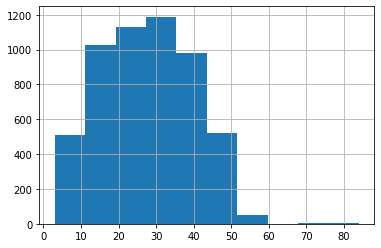

In [24]:
df['tweet_text'].apply(word_counter).hist()

Visualise tweet length **after** data cleaning

<AxesSubplot:>

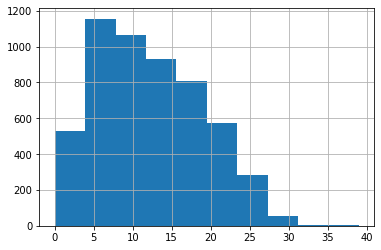

In [23]:
df['tweet_len'].hist()

Characters per tweet. Most tweets had 20-70 characters

<AxesSubplot:>

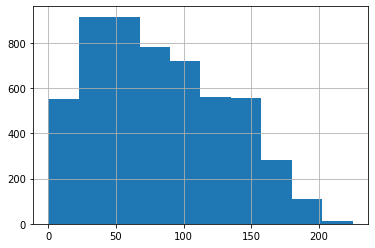

In [26]:
df['char_count'].hist()

Average number of words per tweet

<AxesSubplot:>

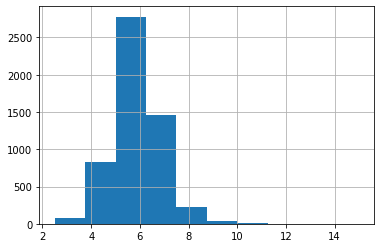

In [27]:
df['avg_word'].hist()

Number of stop words per tweet

<AxesSubplot:>

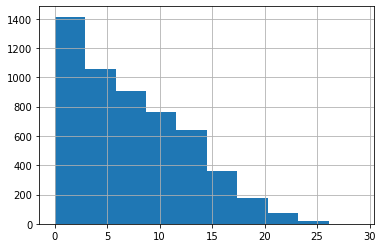

In [28]:
df['stopwords'].hist()

Number of hashtags per tweet

<AxesSubplot:>

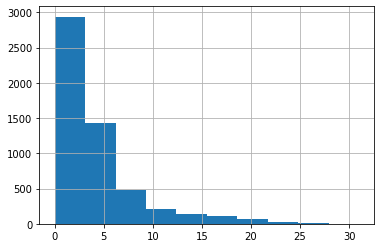

In [29]:
df['hastags'].hist()

Amount of numerical values in tweets

<AxesSubplot:>

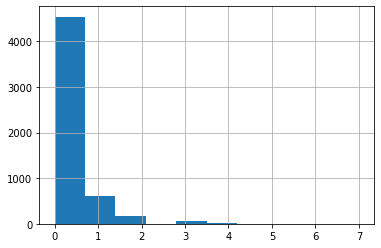

In [30]:
df['numerics'].hist()

# Baseline Model

Transform label (hashtag tweet) into numeric value

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['label'])

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
sentences = df['clean_text']

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)

CountVectorizer(lowercase=False, min_df=0)

Split the data into train and test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
sentences = df['clean_text'].values
y = df['target'].values

In [38]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=100)

In [39]:
#vectorizer = CountVectorizer()
#vectorizer.fit(sentences)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<4328x10880 sparse matrix of type '<class 'numpy.int64'>'
	with 49028 stored elements in Compressed Sparse Row format>

In [40]:
print(X_train.shape)
print(X_train.toarray())

(4328, 10880)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.5942698706099815


In [43]:
y_true = y_test

In [44]:
y_pred = classifier.predict(X_test)

array([[137,  26,  24,   2,   0,  32],
       [ 27, 112,  40,   3,   3,  38],
       [ 10,  13, 115,   1,   2,  71],
       [  9,   6,   7,   9,   0,   6],
       [ 13,   8,   7,   0,  58,  12],
       [ 19,  11,  47,   0,   2, 212]])

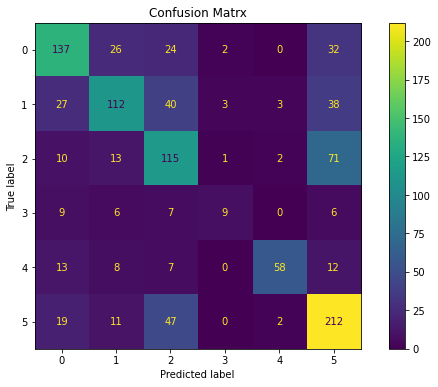

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, ax = ax)
disp.confusion_matrix

In [46]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.62      0.63       221
     class 1       0.64      0.50      0.56       223
     class 2       0.48      0.54      0.51       212
     class 3       0.60      0.24      0.35        37
     class 4       0.89      0.59      0.71        98
     class 5       0.57      0.73      0.64       291

    accuracy                           0.59      1082
   macro avg       0.64      0.54      0.57      1082
weighted avg       0.61      0.59      0.59      1082



### Logistic Regresion k-fold cross validation

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences)

X_sentences = vectorizer.transform(sentences)

In [48]:
from numpy import mean
from numpy import std

In [49]:
from sklearn.model_selection import RepeatedKFold

In [71]:
#cv = KFold(n_splits=10, n_repeats=3, random_state=1, shuffle=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_sentences, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.592 (0.017)


Seems like with our baseline model: logistic regression + boW we get an accuracy of 59%. Lets try and beat that

## SVM

In [40]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.5942698706099815


SVM gets similar results to logistic regression

# Logisitc Regression on only features

In [92]:
X = df[['tweet_len', 'char_count', 'avg_word', 'stopwords', 'hastags', 'numerics']]
y = df[['target']]

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=100)

Replace missing values

In [94]:
xtrain.fillna(xtrain.mean(), inplace=True)

/home/lukabeverin/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [95]:
xtest.fillna(xtrain.mean(), inplace=True)

In [96]:
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
score = classifier.score(xtest, ytest)

print("Accuracy:", score)

Accuracy: 0.29050925925925924


/home/lukabeverin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lukabeverin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Not so good unfortunately. We should attempt to merge bow and new features created.

# CNN + BoW

In [31]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [50]:
sentences = df['clean_text'].values
y = df['target'].values

In [51]:
sentences = df['clean_text']

#vectorizer = CountVectorizer(min_df=0, lowercase=False)
#vectorizer.fit(sentences)

In [52]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=100)

In [45]:
#vectorizer = CountVectorizer()
#vectorizer.fit(sentences)

#X_train = vectorizer.transform(sentences_train)
#X_test  = vectorizer.transform(sentences_test)
#X_train

<4328x10880 sparse matrix of type '<class 'numpy.int64'>'
	with 49028 stored elements in Compressed Sparse Row format>

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf..

In [53]:
tokenizer = Tokenizer(num_words=10000)
#tokenizer.fit_on_texts(sentences_train)
tokenizer.fit_on_texts(sentences)

In [54]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [55]:
trainX = pad_sequences(X_train, maxlen=100, value=0.)
testX = pad_sequences(X_test, maxlen=100, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(y_train, nb_classes=6)
testY = to_categorical(y_test, nb_classes=6)

tf.reset_default_graph()
# Building convolutional network
network = input_data(shape=[None, 100], name='input')
network = tflearn.embedding(network, input_dim=10000, output_dim=128)
branch1 = conv_1d(network, 128, 16, padding='valid', activation='relu', regularizer="L2")
branch2 = conv_1d(network, 128, 8, padding='valid', activation='relu', regularizer="L2")
branch3 = conv_1d(network, 128, 3, padding='valid', activation='relu', regularizer="L2")
network = merge([branch1, branch2, branch3], mode='concat', axis=1)
network = tf.expand_dims(network, 2)
network = global_max_pool(network)
network = dropout(network, 0.5)
network = fully_connected(network, 6, activation='softmax')

network = regression(network, optimizer='adam', learning_rate=0.001,
                     loss='categorical_crossentropy', name='target')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(trainX, trainY, n_epoch = 10, shuffle=True, validation_set=(testX, testY), show_metric=True, batch_size=64)

Training Step: 679  | total loss: 0.17648 | time: 16.283s
| Adam | epoch: 010 | loss: 0.17648 - acc: 0.9588 -- iter: 4288/4328
Training Step: 680  | total loss: 0.18189 | time: 17.531s
| Adam | epoch: 010 | loss: 0.18189 - acc: 0.9535 | val_loss: 1.37784 - val_acc: 0.5915 -- iter: 4328/4328
--


In [57]:
pred_proba = model.predict(testX)
predictions = []

for i in range(len(pred_proba)):
    max_predictions = np.argmax(pred_proba[i])
    predictions.append(max_predictions)
    
    
ground_values = np.where(testY==1)[1].tolist()

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ground_values, predictions)

array([[130,  19,  41,   9,   5,  17],
       [ 24, 125,  39,   3,   6,  26],
       [  9,  20, 121,   4,   5,  53],
       [  9,   9,   7,   9,   1,   2],
       [  5,  11,   7,   4,  61,  10],
       [ 17,  22,  52,   5,   1, 194]])

In [59]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
print(classification_report(ground_values, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.59      0.63       221
     class 1       0.61      0.56      0.58       223
     class 2       0.45      0.57      0.51       212
     class 3       0.26      0.24      0.25        37
     class 4       0.77      0.62      0.69        98
     class 5       0.64      0.67      0.65       291

    accuracy                           0.59      1082
   macro avg       0.57      0.54      0.55      1082
weighted avg       0.60      0.59      0.59      1082



# CNN + tldf

In [115]:
sentences = df['clean_text'].values
y = df['target'].values

In [116]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=100)

In [117]:
#import the count vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer
# instantiate the class
vectorizer = TfidfVectorizer()

vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<3452x8445 sparse matrix of type '<class 'numpy.float64'>'
	with 39509 stored elements in Compressed Sparse Row format>

In [119]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences_train)

In [120]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [121]:
trainX = pad_sequences(X_train, maxlen=100, value=0.)
testX = pad_sequences(X_test, maxlen=100, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(y_train, nb_classes=6)
testY = to_categorical(y_test, nb_classes=6)

tf.reset_default_graph()
# Building convolutional network
network = input_data(shape=[None, 100], name='input')
network = tflearn.embedding(network, input_dim=10000, output_dim=128)
branch1 = conv_1d(network, 128, 16, padding='valid', activation='relu', regularizer="L2")
branch2 = conv_1d(network, 128, 8, padding='valid', activation='relu', regularizer="L2")
branch3 = conv_1d(network, 128, 3, padding='valid', activation='relu', regularizer="L2")
network = merge([branch1, branch2, branch3], mode='concat', axis=1)
network = tf.expand_dims(network, 2)
network = global_max_pool(network)
network = dropout(network, 0.5)
network = fully_connected(network, 6, activation='softmax')

network = regression(network, optimizer='adam', learning_rate=0.001,
                     loss='categorical_crossentropy', name='target')

In [122]:
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(trainX, trainY, n_epoch = 10, shuffle=True, validation_set=(testX, testY), show_metric=True, batch_size=64)

Training Step: 539  | total loss: 0.18057 | time: 8.435s
| Adam | epoch: 010 | loss: 0.18057 - acc: 0.9501 -- iter: 3392/3452
Training Step: 540  | total loss: 0.17693 | time: 9.599s
| Adam | epoch: 010 | loss: 0.17693 - acc: 0.9520 | val_loss: 1.34849 - val_acc: 0.5648 -- iter: 3452/3452
--


In [123]:
pred_proba = model.predict(testX)
predictions = []

for i in range(len(pred_proba)):
    max_predictions = np.argmax(pred_proba[i])
    predictions.append(max_predictions)
    
    
ground_values = np.where(testY==1)[1].tolist()

In [124]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ground_values, predictions)

array([[ 95,  21,  23,   2,   4,  15],
       [ 28,  93,  19,   3,   6,  28],
       [ 17,  23,  98,   2,   4,  49],
       [ 10,   4,   2,   1,   6,   5],
       [  5,   4,   6,   1,  44,   5],
       [ 19,  20,  33,   2,  10, 157]])

In [125]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']
print(classification_report(ground_values, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.59      0.57       160
     class 1       0.56      0.53      0.54       177
     class 2       0.54      0.51      0.52       193
     class 3       0.09      0.04      0.05        28
     class 4       0.59      0.68      0.63        65
     class 5       0.61      0.65      0.63       241

    accuracy                           0.56       864
   macro avg       0.49      0.50      0.49       864
weighted avg       0.55      0.56      0.56       864



# Logistic regression + tldf

In [60]:
sentences = df['clean_text']

#vectorizer = CountVectorizer(min_df=0, lowercase=False)
#vectorizer.fit(sentences)

In [61]:
sentences = df['clean_text'].values
y = df['target'].values

In [62]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=100)

In [63]:
#import the count vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vectorizer = TfidfVectorizer()

vectorizer.fit(sentences)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<4328x10880 sparse matrix of type '<class 'numpy.float64'>'
	with 49028 stored elements in Compressed Sparse Row format>

In [65]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.5988909426987061


In [66]:
y_true = y_test

In [67]:
y_pred = classifier.predict(X_test)

array([[130,  23,  28,   1,   0,  39],
       [ 26, 115,  42,   1,   1,  38],
       [ 12,  11, 121,   0,   1,  67],
       [  9,   8,  10,   3,   0,   7],
       [ 14,  10,   9,   0,  52,  13],
       [ 16,   8,  40,   0,   0, 227]])

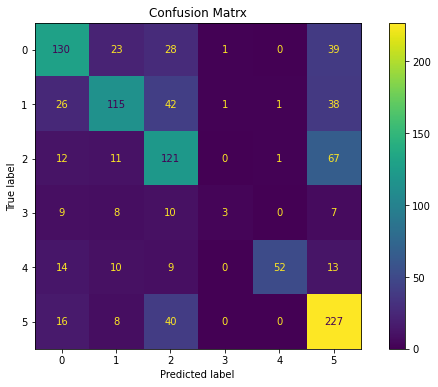

In [68]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, ax = ax)
disp.confusion_matrix

In [70]:
vectorizer = TfidfVectorizer()
vectorizer.fit(sentences)

X_sentences = vectorizer.transform(sentences)

In [71]:
#cv = KFold(n_splits=10, n_repeats=3, random_state=1, shuffle=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_sentences, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.604 (0.020)


# Results

- Logistic regression + tfidf: 0.604 (0.020)
- Logistic regression + bow: 0.592 (0.017)

What is the best metric to measure multi-class classification?

Problems associated with the Bag of Words method

  - The semantic analysis of the sentence is not taken into consideration
  - The context of the words is overlooked and we already saw how important context is.
  - The word arrangement is discarded. The arrangement of words in the sentence does not matter in both bag of words techniques. For example, in the bag of words techniques, the sentence “Red means stop” is represented the same way as “Stop means read” which of course is incorrect.
  - With a bag of words, there are higher chances of overfitting. 

## Word cloud

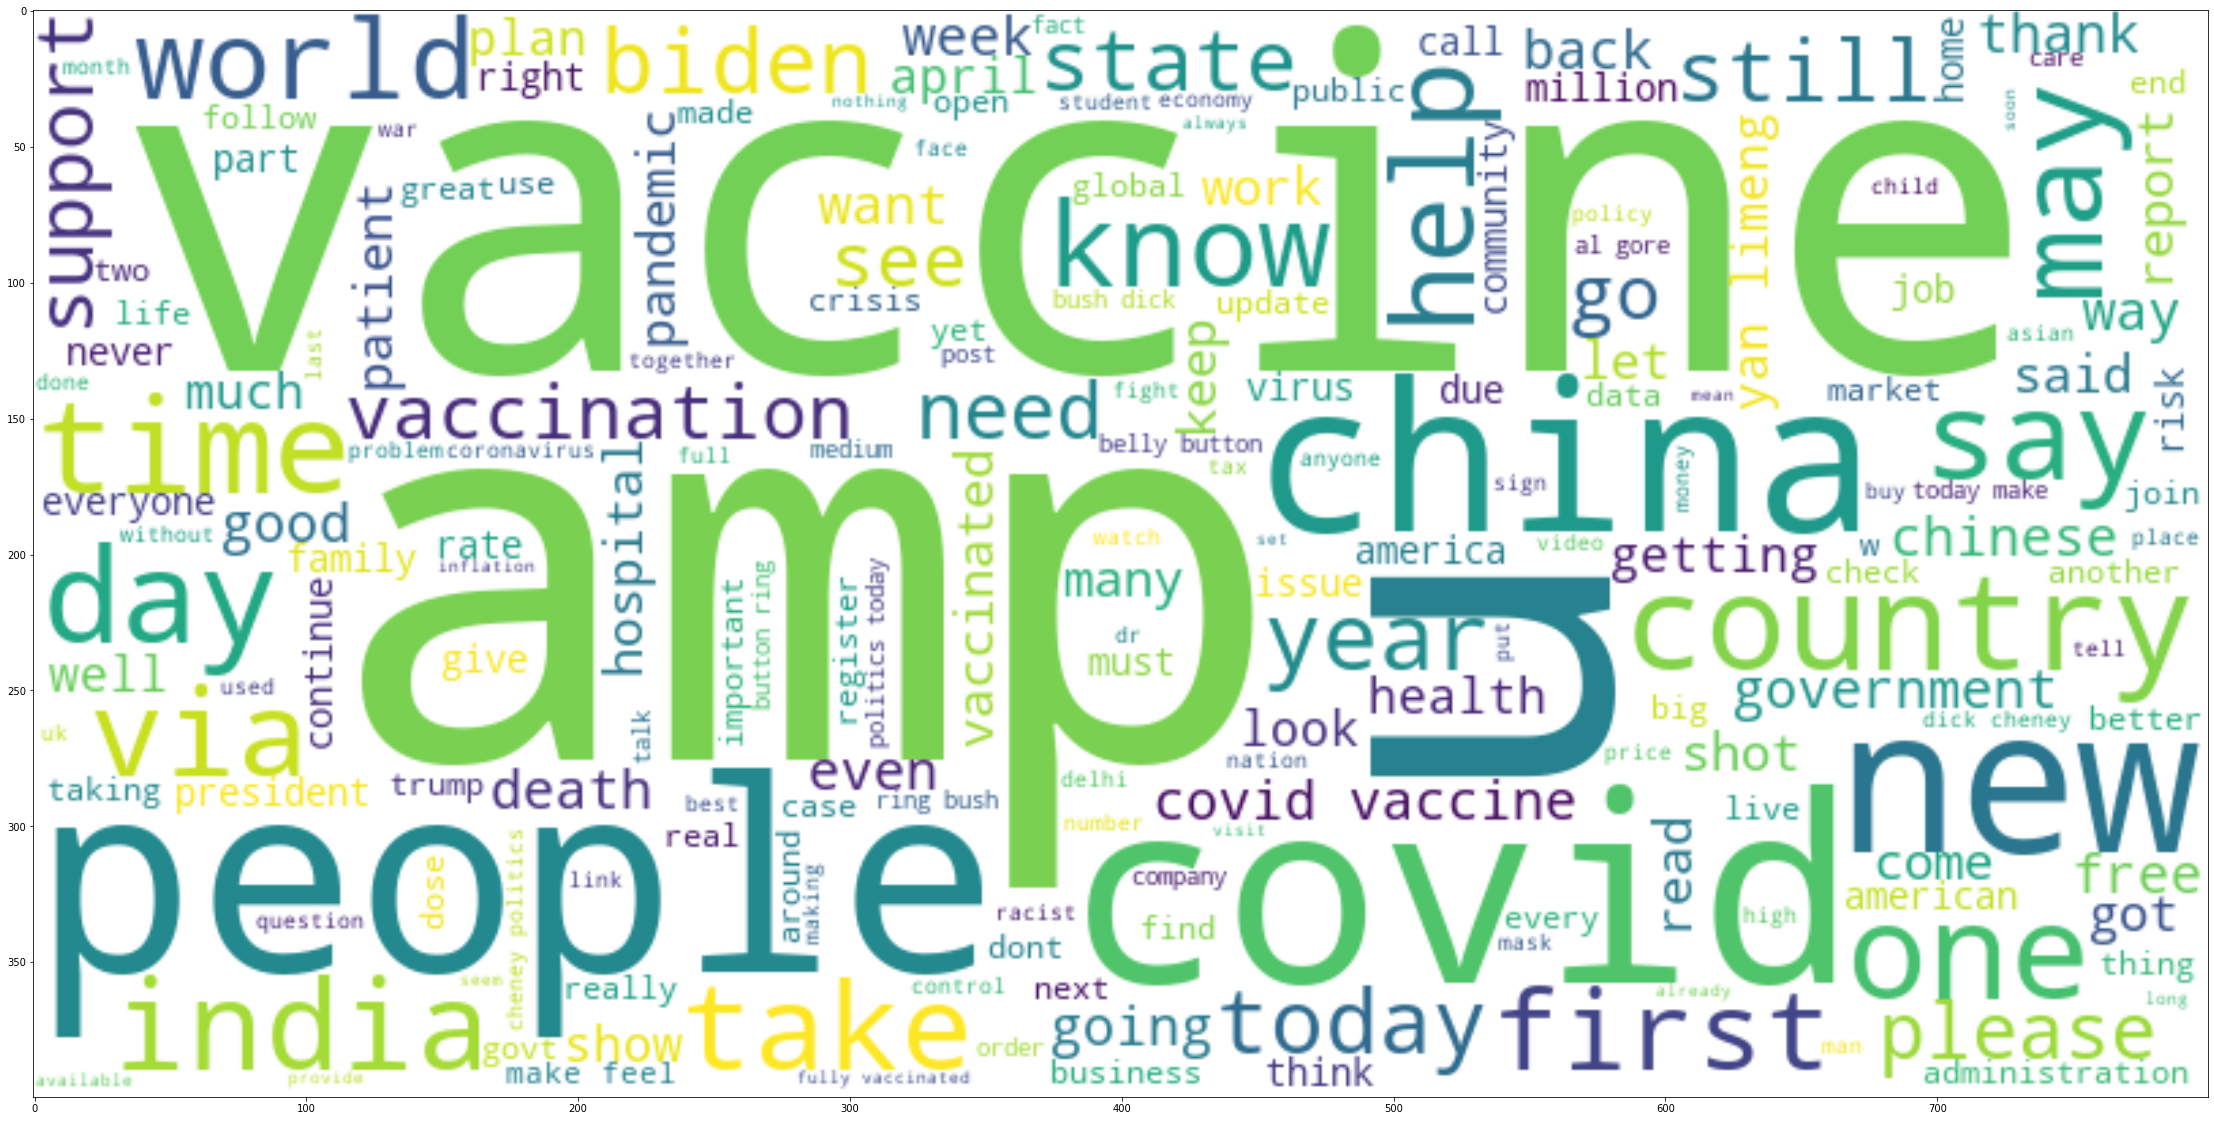

In [74]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
text = " ".join(review for review in df.clean_text.astype(str))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
#plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()